In [1]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 10 # Set default width and height for matplotlib figures

In [2]:
import matplotlib.pyplot as plt
import sqlite3
import config

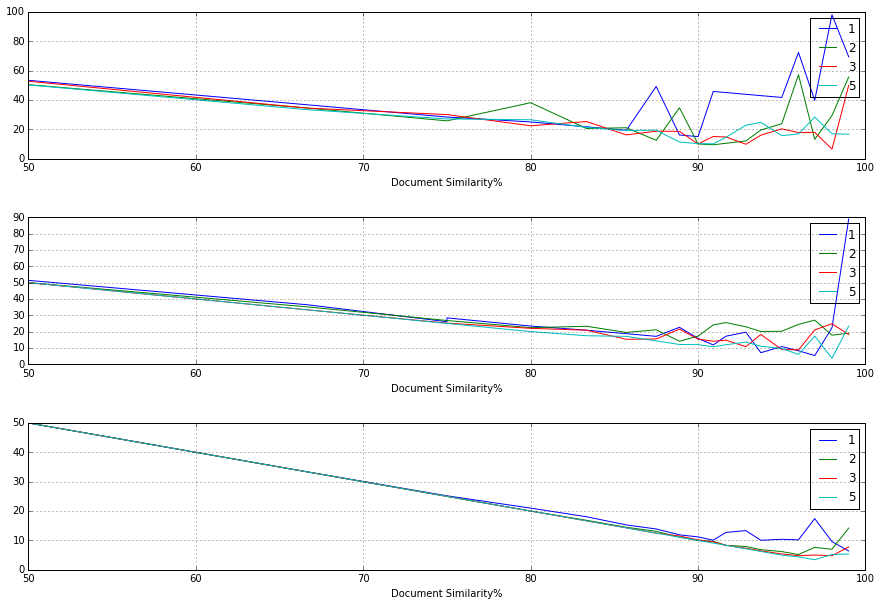

In [23]:
# Plot accuracy of each hashing method vs file similarity

conn = sqlite3.connect('comparison_results.db')
c = conn.cursor()

resultset = 'test_data3'
sql = """SELECT actual_similarity, shingle_type, shingle_size, similarity_rating, 
1 - ABS(actual_similarity-similarity_rating) AS accuracy
FROM comparison_results
WHERE shingle_type=? and data_dir=? 
ORDER BY actual_similarity, shingle_type

"""

fig, ax = plt.subplots(3)

def plot_rows(rows, axis):
    plot_data = {}
    for row in rows:
        #print row
        if row[2] not in plot_data:
            plot_data[row[2]] = {"x":[], "y":[]}
        plot_data[row[2]]["x"].append(row[0]*100)
        plot_data[row[2]]["y"].append(row[4]*100)
    #print plot_data
    plot_handles = {}
    for d in plot_data:
        plot_handles[d], = axis.plot(plot_data[d]["x"], plot_data[d]["y"], label=str(d))
    axis.legend(handles=plot_handles.values())
    axis.set_xlabel("Document Similarity%")
    axis.set_ylabel("Accuracy%")
    axis.grid(True)

plot_rows(c.execute(sql, ('word',resultset)), ax[0])
plot_rows(c.execute(sql, ('triple',resultset)), ax[1])
plot_rows(c.execute(sql, ('turtle',resultset)), ax[2])

plt.subplots_adjust(hspace=.4)
plt.savefig('fig_shingle_size_accuracy.png')


**Conclusion:** Lower shingle size enhances accuracy, taking into account triples or turtle statements lowers accuracy.

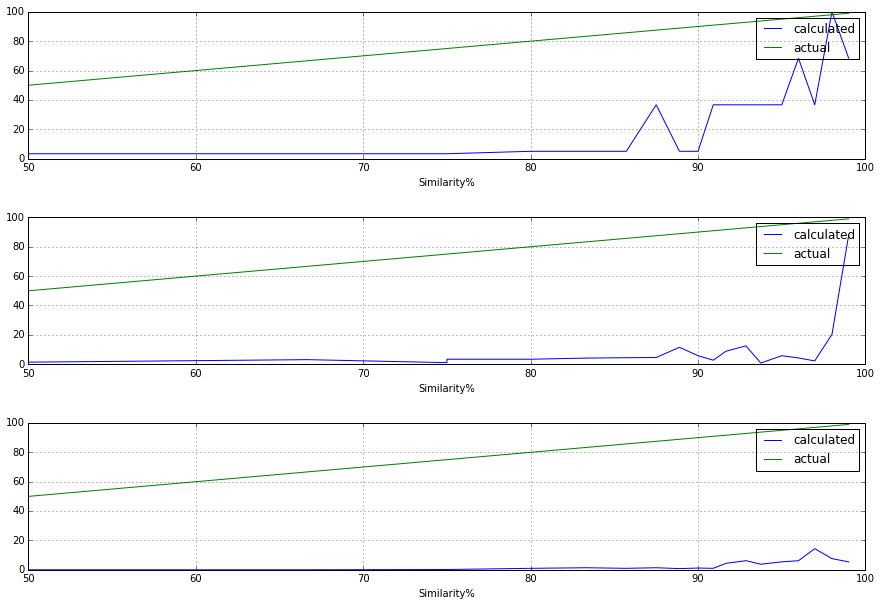

In [6]:
# Plot calculated similarity vs similarity rate

conn = sqlite3.connect('comparison_results.db')
c = conn.cursor()

resultset = 'test_data3'
sql = """SELECT actual_similarity, shingle_type, shingle_size, similarity_rating
FROM comparison_results
WHERE shingle_type=? and data_dir=?
AND shingle_size = 1
ORDER BY actual_similarity, shingle_type

"""

fig, ax = plt.subplots(3)

def plot_rows(rows, axis):
    plot_data = {
        "calculated": {"x":[], "y":[]},
        "actual": {"x":[], "y":[]}
    }
    for row in rows:
        #print row
        plot_data["calculated"]["x"].append(row[0]*100)
        plot_data["actual"]["x"].append(row[0]*100)
        plot_data["calculated"]["y"].append(row[3]*100)
        plot_data["actual"]["y"].append(row[0]*100)
    #print plot_data
    plot_handles = {}
    for d in plot_data:
        plot_handles[d], = axis.plot(plot_data[d]["x"], plot_data[d]["y"], label=str(d))
    axis.legend(handles=plot_handles.values())
    axis.set_xlabel("Document Similarity%")
    axis.grid(True)


plot_rows(c.execute(sql, ('word',resultset)), ax[0])
plot_rows(c.execute(sql, ('triple',resultset)), ax[1])
plot_rows(c.execute(sql, ('turtle',resultset)), ax[2])

plt.subplots_adjust(hspace=.4)
plt.savefig('fig_shingle_size_accuracy.png')

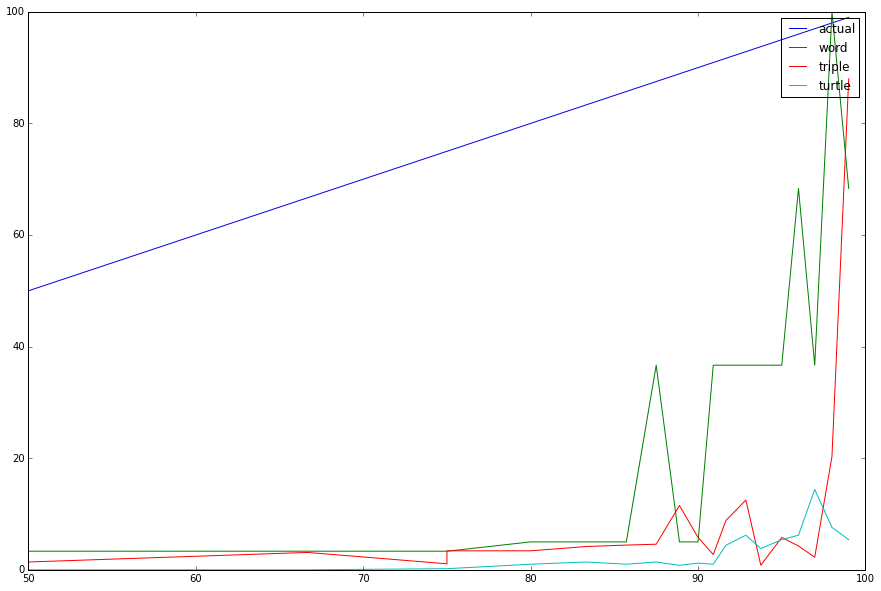

In [20]:
# Plot calculated similarity vs similarity rate

conn = sqlite3.connect('comparison_results.db')
c = conn.cursor()

resultset = 'test_data3'
sql = """SELECT actual_similarity, similarity_rating
FROM comparison_results
WHERE shingle_type=? AND data_dir=?
AND shingle_size = 1
ORDER BY actual_similarity

"""

#fig, ax = plt.subplots(3)

def plot_rows(rows, axis, label=""):
    plot_data = {
        "x":[], 
        "y":[]
    }
    for row in rows:
        #print row
        plot_data["x"].append(row[0]*100)
        plot_data["y"].append(row[1]*100)
    #print plot_data
    plot_handles = {}
    return axis.plot(plot_data["x"], plot_data["y"], label=label)


plot_rows(c.execute(sql.replace("similarity_rating","actual_similarity"), ('word',resultset)), plt, "actual")
plot_rows(c.execute(sql, ('word',resultset)), plt, "word")
plot_rows(c.execute(sql, ('triple',resultset)), plt, "triple")
plot_rows(c.execute(sql, ('turtle',resultset)), plt, "turtle")
plt.legend()

plt.savefig('fig_shingle_type_accuracy2.png')